# Named entity recognition

The exercise shows how we may extract elements such as names of companies, countries and similar objects from text.

## Tasks

1. Read the classification of [Named Entities](http://clarin-pl.eu/pliki/warsztaty/Wyklad3-inforex-liner2.pdf).

In [243]:
import spacy
from spacy.tokenizer import *
import regex
import string
from tqdm import tqdm

2. Read the [API of NER](http://nlp.pwr.wroc.pl/redmine/projects/nlprest2/wiki) in [Clarin](http://ws.clarin-pl.eu/ner.shtml).

3. Read the [documentation of CLL format](http://nlp.pwr.wroc.pl/redmine/projects/corpus2/wiki/CCL_format).
4. Sort bills according to their size and take top 50 (largest) bills.

In [7]:
import glob
import os
dir_name = '../data/ustawy/'
# Get a list of files (file paths) in the given directory 
list_of_files = filter( os.path.isfile,
                        glob.glob(dir_name + '*') )


# Sort list of files in directory by size 
list_of_files = sorted( list_of_files,
                        key =  lambda x: os.stat(x).st_size)

list_of_files = list_of_files[-50:]
print(len(list_of_files))

# Iterate over sorted list of files in directory and 
# print them one by one along with size
for elem in list_of_files:
    file_size  = os.stat(elem).st_size 
    print(file_size, ' -->', elem)   


50
133784  --> ../data/ustawy/2001_1444.txt
136489  --> ../data/ustawy/1997_153.txt
141328  --> ../data/ustawy/1996_496.txt
142132  --> ../data/ustawy/2001_92.txt
143601  --> ../data/ustawy/2001_906.txt
148194  --> ../data/ustawy/1998_602.txt
148449  --> ../data/ustawy/2003_2256.txt
149411  --> ../data/ustawy/2001_475.txt
150870  --> ../data/ustawy/2001_628.txt
152985  --> ../data/ustawy/2001_1188.txt
154639  --> ../data/ustawy/1996_561.txt
161341  --> ../data/ustawy/2001_1438.txt
163118  --> ../data/ustawy/1996_460.txt
168282  --> ../data/ustawy/2000_136.txt
174145  --> ../data/ustawy/2001_1381.txt
175787  --> ../data/ustawy/1999_95.txt
178805  --> ../data/ustawy/1997_557.txt
179878  --> ../data/ustawy/1996_110.txt
180335  --> ../data/ustawy/2004_2533.txt
182152  --> ../data/ustawy/1994_591.txt
182337  --> ../data/ustawy/1999_930.txt
183107  --> ../data/ustawy/2000_1315.txt
188718  --> ../data/ustawy/1997_349.txt
190810  --> ../data/ustawy/2003_423.txt
212340  --> ../data/ustawy/2004_

In [ ]:
# !python -m spacy download pl_core_news_sm

5. Use the lemmatized and sentence split documents (from ex. 5) to identify the expressions that consist of consecutive
   words starting with a capital letter (you will have to look at the inflected form of the word to check its
   capitalization) that do not occupy the first position in a sentence. E.g. the sentence:
   ```
   Wczoraj w Krakowie miało miejsce spotkanie prezydentów Polski i Stanów Zjednoczonych.
   ```
   should yield the following entries: `Kraków`, `Polska`, `Stan Zjednoczony`.

In [17]:
nlp = spacy.load("pl_core_news_sm")
tokenizer = Tokenizer(nlp.vocab)

tokens = {}
tokens_list = []
i = 0
path = "../data/ustawy"
for filename in list_of_files:
    with open(filename, "r", encoding="utf-8") as file:
        act = file.read()
        act = regex.sub(r"\s+", " ", act)
        act = regex.sub(r"­", "", act)
#         act = act.lower()
        words = [token.text for token in tokenizer(act)]
        tokens[file.name] = words
        tokens_list = tokens_list + words
        i += 1
        if i % 10 == 0:
            print(i)

old_tokens_list = tokens_list


10
20
30
40
50


In [19]:
def separate_puctuations(tokens):
    new_tokens = []
    for token in tokens:
        splitted = regex.findall(
            r"[\w']+|[.,!?;]", token
        )  # https://stackoverflow.com/questions/367155/splitting-a-string-into-words-and-punctuation
        new_tokens += splitted
    return new_tokens


In [20]:
tokens = separate_puctuations(tokens_list)

In [26]:
" ".join(tokens)

"Dz . U . z 2001 r . Nr 129 , poz . 1444 USTAWA z dnia 6 września 2001 r . o zmianie ustawy Prawo o ruchu drogowym Art . 1 . W ustawie z dnia 20 czerwca 1997 r . Prawo o ruchu drogowym Dz . U . Nr 98 , poz . 602 , Nr 123 , poz . 779 i Nr 160 , poz . 1086 , z 1998 r . Nr 106 , poz . 668 i Nr 133 , poz . 872 , z 1999 r . Nr 106 , poz . 1216 , z 2000 r . Nr 12 , poz . 136 , Nr 43 , poz . 483 , Nr 53 , poz . 649 oraz z 2001 r . Nr 27 , poz . 298 wprowadza się następujące zmiany 1 w art . 2 a pkt 2 otrzymuje brzmienie 2 droga twarda drogę z jezdnią o nawierzchni bitumicznej , betonowej , kostkowej , klinkierowej lub brukowcowej oraz z płyt betonowych lub kamienno betonowych , jeżeli długość nawierzchni przekracza 20 m ; inne drogi są drogami gruntowymi , , b pkt 5 otrzymuje brzmienie 5 droga dla rowerów drogę lub jej część przeznaczoną do ruchu rowerów jednośladowych , oznaczoną odpowiednimi znakami drogowymi , , c pkt 6 otrzymuje brzmienie 6 jezdnia część drogi przeznaczoną do ruchu pojazd

In [112]:
import urllib.request as urllib2
import urllib.request
import requests


url = 'http://ws.clarin-pl.eu/nlprest2/base'

with open ("xml/file.txt", "rb") as myfile:
    doc=myfile.read()
    r = requests.postpost(url+'/upload/',doc,{'Content-Type': 'binary/octet-stream'})

    print(r.status_code, r.reason)


    r??
#     print(r.data)
#     print(r.get_method())
#     print(r.header_items())
# urllib2.urlopen(urllib2.Request('http://ws.clarin.pl.eu/nlprest2/base/download/'+r)).read();    


500 Internal Server Error


In [249]:
user="danielrokosowski@gmail.com" 
# user='gsroka@student.agh.edu.pl'

url='http://ws.clarin-pl.eu/nlprest2/base'
lpmn='any2txt|wcrft2|liner2({"model":"n82"})'

headers ={'Content-Type': 'binary/octet-stream'}
headers1 = {'Content-Type': 'application/json'}

in_path = 'paczka/*'
out_path= 'out/'

def start_task(doc : string):
    req = requests.post(f'{url}/upload',data=doc,headers=headers)
    fileid = req.text
    data={'lpmn':lpmn,'user':user,'file':fileid}


    taskid = requests.post(f'{url}/startTask/',json=data).text
    return taskid
    
def wait(taskid : string) ->string:
    resp = requests.get(f'{url}/getStatus/{taskid}').text
    data = json.loads(resp)
    i=0
    while data["status"] == "QUEUE" or data["status"] == "PROCESSING" :
        resp = requests.get(f'{url}/getStatus/{taskid}').text
        data = json.loads(resp)

        if data["status"]=="ERROR":
            print("Error "+data["value"]);
            return None
        time.sleep(1.0)
        i+=1
#         if i%30==0:
#             print(i,data["status"] )
    data = data["value"]
    if data!=None:
        return data[0]["fileID"]
    return None

def save(file,fileid):
    content = requests.get(f'{url}/download{fileid}')
    with open (f'{out_path}/{os.path.basename(file)}.ccl', "w") as outfile:
        outfile.write(content.text)
    

taskids = [ ]
for filename in list_of_files:
    with open(filename, "rb") as myfile:
        doc=myfile.read()
        taskid = start_task(doc)
        taskids.append(taskid)

for filename,taskid in tqdm(zip(list_of_files,taskids)):
    fileid = wait(taskid)
    save(filename,fileid)

# for filename in ['paczka/file.txt']:
#     with open (filename, "rb") as myfile:
#         doc=myfile.read()
#         taskid = start_task(doc)

#         fileid = wait(taskid)
#         save(filename,fileid)


50it [16:07, 19.36s/it]


In [378]:
# Źródło https://github.com/CLARIN-PL/NlpRest2-Tutorials/blob/master/part3.ipynb

class Token:
    def __init__(self, orth, base, ctag):
        self.orth = orth
        self.base = base
        self.ctag = ctag
        
    def get_orth(self): # Sejmu
        return self.orth
    
    def get_base(self): #sejm
        return self.base
    
    def get_ctag(self): #subst:sg:gen:m3
        return self.ctag
        

class Annotation:
    
    def __init__(self, category, tokens):
        self.category = category
        self.tokens = tokens
        self.lemma = self.get_orth()
        
    def get_category(self): # nam_org_institution
        return self.category
    
    def get_tokens(self):
        return self.tokens
    
    def get_orth(self):
        return " ".join([token.get_orth() for token in self.tokens]) #Sejmu Rzeczypospolitej Polskiej

    def get_base(self):
        return " ".join([token.get_base() for token in self.tokens]) #'sejm rzeczpospolita polski
    
    def get_ctag(self):
        return " ".join([token.get_ctag() for token in self.tokens]) #subst:sg:gen:m3 subst:sg:gen:f adj:sg:gen:f:pos
    
    def get_space(self):
        return " ".join(["True" for token in self.tokens]) # True True True
    
    def get_lemma(self):  #Sejmu Rzeczypospolitej Polskiej
        return self.lemma
    
    def set_lemma(self, lemma):
        self.lemma = lemma
        
    def get_coarse_category(self):
        return re.findall('^[a-z]+_[a-z]+',self.category)[0]

    def __str__(self): 
        return "[%s] %s" % (self.get_category(), self.get_lemma())

    
    
import xml.etree.ElementTree as ET

def sentence_ner(sentence):
    channels = {}
    for token in sentence.iter("tok"):
        orth = token.find("./orth").text
        base = token.find("./lex/base").text
        ctag = token.find("./lex/ctag").text
        t = Token(orth, base, ctag)
        for channel in token.iter("ann"):            
            index = int(channel.text)
            chan = channel.attrib["chan"]            
            if index > 0:                
                channels.setdefault(chan, {}) \
                        .setdefault(index, []) \
                        .append(t)
                
    annotations = []
    for (ann_type, group) in channels.items():
        for tokens in group.values():            
            an = Annotation(ann_type, tokens)
            annotations.append(an)
    
    return annotations
                

def ccl_ner(ccl):
    tree = ET.fromstring(ccl)
    annotations = []
    for sentence in tree.iter("sentence"):
        annotations += sentence_ner(sentence)
    return annotations


# Test on a single document
# with open('2001_1444.txt.ccl',"r") as file:
#     ccl = file.read()
#     annotations = ccl_ner(ccl)
#     for annotation in annotations:
#         print(annotation)

annotations = [] 
dir_name = 'out1/'
ccl_files = list(filter( os.path.isfile, glob.glob(dir_name + '*') ))
for ccl_file in ccl_files:
    with open(ccl_file,"r") as file:
        ccl = file.read()
        annotations += ccl_ner(ccl)
        

In [376]:
def get_coarse_category(category_name):
    return re.findall('^[a-z]+_[a-z]+',category_name)[0]

get_coarse_category('nam_org_institution')

'nam_org'

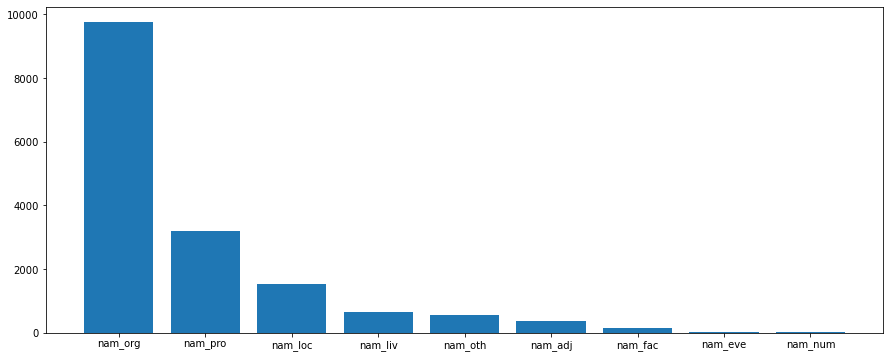

In [381]:
from collections import Counter
import matplotlib.pyplot as plt
import re


categories = [a.get_coarse_category() for a in annotations]
c = Counter(categories)

# wyjaśnienie nazw kategori
# http://nlp.pwr.wroc.pl/redmine/projects/nlprest2/wiki/Liner2_nazwy
fig = plt.figure(figsize=(15,6))
category_name, count = list(zip(*c.most_common()))
plt.bar(category_name,count)
plt.show()

In [382]:
from collections import defaultdict
ners10 = defaultdict(int)

ners10 = {c:[] for c in category_name}

for a in annotations:
    ners10[a.get_coarse_category()].append(a.get_orth())

In [392]:
[(cat,Counter(ners).most_common(10)) for (cat , ners) in ners10.items()]

[('nam_org',
  [('Skarbu Państwa', 295),
   ('Unii Europejskiej', 291),
   ('Rada Ministrów', 261),
   ('Państwowej Straży Pożarnej', 239),
   ('Minister Sprawiedliwości', 233),
   ('Prezes Rady Ministrów', 213),
   ('Minister Obrony Narodowej', 162),
   ('Minister Finansów', 152),
   ('Urzędu Ochrony Państwa', 137),
   ('EFTA', 114)]),
 ('nam_pro',
  [('Dz . U .', 1534),
   ('Dz . Urz', 80),
   ('Ordynacja podatkowa', 71),
   ('Kodeksu karnego', 64),
   ('Monitor Polski', 62),
   ('Spraw Wewnętrznych', 51),
   ('Kodeksu postępowania administracyjnego', 35),
   ('Kodeksu postępowania karnego', 33),
   ('Kodeksu postępowania cywilnego', 32),
   ('Natura 2000', 26)]),
 ('nam_loc',
  [('Rzeczypospolitej Polskiej', 812),
   ('Rzeczpospolita Polska', 52),
   ('Polsce', 51),
   ('Rzeczpospolitą Polską', 39),
   ('Warszawie', 32),
   ('Warszawy', 20),
   ('Nawóz', 19),
   ('Warszawa', 16),
   ('Konfederacji Szwajcarskiej', 11),
   ('Polską', 10)]),
 ('nam_liv',
  [('Kasa Chorych', 51),
   ('S

In [405]:
import pandas as pd
finegrained = {a.get_orth() : a.get_category() for a in annotations}


ner, count = list(zip(*Counter([a.get_orth() for a in annotations]).most_common(50)))
category = [finegrained[n] for n in ner]
pd.DataFrame({'ner': ner,'count':count, 'fine-grained category':category})

ner  count  \
0                                          Dz . U .   1534   
1                         Rzeczypospolitej Polskiej    812   
2                                    Skarbu Państwa    295   
3                                                zł    293   
4                                 Unii Europejskiej    291   
5                                    Rada Ministrów    262   
6                        Państwowej Straży Pożarnej    239   
7                          Minister Sprawiedliwości    233   
8                             Prezes Rady Ministrów    213   
9                         Minister Obrony Narodowej    162   
10                                Minister Finansów    152   
11                           Urzędu Ochrony Państwa    137   
12                                Straży Granicznej    131   
13                                           polski    116   
14                                             EFTA    114   
15                       Państwowa Komisja Wyborcza    110   
16                                  Urząd Patentowy    104   
17       Europejskiego Porozumienia o Wolnym Handlu    103   
18                     Państwowej Komisji Wyborczej     98   
19                                    Skarb Państwa     98   
20                                             euro     89   
21                                    Prezes Urzędu     88   
22                                            OKRĘG     81   
23                      Okręgowej Komisji Wyborczej     81   
24                                         Dz . Urz     80   
25                                            Sejmu     73   
26                              Ordynacja podatkowa     71   
27                                   Prezesa Urzędu     71   
28                                            BSWSG     70   
29                                         Funduszu     68   
30                                  Kodeksu karnego     64   
31                       Ministrem Obrony Narodowej     63   
32                                   Monitor Polski     62   
33             Minister Zdrowia i Opieki Społecznej     59   
34                                    Sił Zbrojnych     58   
35                           Wspólnoty Europejskiej     58   
36                                               WE     55   
37                                    Sąd Najwyższy     53   
38                             Komisji Europejskiej     53   
39                         Ministra Sprawiedliwości     52   
40                            Rzeczpospolita Polska     52   
41  Dzienniku Urzędowym Rzeczypospolitej Polskiej "     51   
42                                 Sądu Najwyższego     51   
43                                           Polsce     51   
44                               Spraw Wewnętrznych     51   
45                                     Kasa Chorych     51   
46                                           Senatu     49   
47                   Inspektor Nadzoru Wewnętrznego     49   
48                              Biura Ochrony Rządu     48   
49               Prezes Urzędu Regulacji Energetyki     47   

     fine-grained category  
0   nam_pro_media_periodic  
1      nam_loc_gpe_country  
2      nam_org_institution  
3         nam_oth_currency  
4     nam_org_organization  
5      nam_org_institution  
6     nam_org_organization  
7      nam_org_institution  
8      nam_org_institution  
9      nam_org_institution  
10     nam_org_institution  
11     nam_org_institution  
12          nam_liv_person  
13         nam_adj_country  
14    nam_org_organization  
15     nam_org_institution  
16     nam_org_institution  
17         nam_org_company  
18     nam_org_institution  
19     nam_org_institution  
20        nam_oth_currency  
21     nam_org_institution  
22    nam_org_organization  
23     nam_org_institution  
24  nam_pro_media_periodic  
25     nam_org_institution  
26  nam_pro_title_document  
27     nam_org_institution  
28    nam_org_organization  
29    nam_org_o

In [396]:
token = annotations[2].get_tokens()[0]
token.get_ctag()

'subst:sg:gen:m3'

In [ ]:
[a.  for a in annotations]

In [ ]:
requests.post()

In [149]:
type(json.dumps(data))

str

In [113]:
# fileid = 'users/default/39ba944e-09ea-4095-a43f-b5000c903450'
urllib2.urlopen(urllib2.Request('http://ws.clarin.pl.eu/nlprest2/base/download/'+r)).read();    


TypeError: can only concatenate str (not "Response") to str

6. Compute the frequency of each identified expression and print 50 results with the largest number of occurrences.

7. Apply the NER algorithm to identify the named entities in the same set of documents (not lemmatized) using the `n82` model.

8. Plot the frequency (histogram) of the coarse-grained classes (e.g. `nam_adj`, `nam_eve`, `nam_fac`).

9. Display 10 most frequent Named Entities for each coarse-grained type.

10. Display 50 most frequent Named Entities including their count and fine-grained type.

11. Display 5 sentences containing at least 2 recognized named entities with different types. Highlight the recognized spans with color.
   (For demo application [Streamlit](https://streamlit.io/) might be useful for displaying NER results).

12. Answer the following questions:
   1. Which of the method (counting expressions with capital letters vs. NER) worked better for the task concerned with
      identification of the proper names?
   1. What are the drawbacks of the method based on capital letters?
   1. What are the drawbacks of the method based on NER?
   1. Which of the coarse-grained NER groups has the best and which has the worst results? Try to justify this
      observation.
   1. Do you think NER is sufficient for identifying different occurrences of the same entity (i.e. consider "USA" and
      "Stany Zjednoczone" and "Stany Zjednoczone Ameryki Północnej")? If not, can you suggest an algorithm or a tool that
      would be able to group such names together?
   1. Can you think of a real world problem that would benefit the most from application of Named Entity Recognition
      algorithm?